<a href="https://colab.research.google.com/github/julihocc/ulsaPye/blob/master/Unidad102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ortools

     |████████████████████████████████| 14.4 MB 94 kB/s 


In [ ]:
from ortools.graph import pywrapgraph
import graphviz as gv
import matplotlib.pyplot as plt
import matplotlib.image as img

In [ ]:
"""MinCostFlow simple interface example."""

#Definir 4 arrays paralelos: start_nodes, end_nodes, capacities, and unit costs
# Es importante agregar un flujo de regreso entre el nodo inicial y final para transformar
#el problema en un problema de costo mínimo: (5,0 capacidad:1 y costo: 1)

start_nodes = [0,0,0, 1,1,2,2,2,3,3,4,4,5]
end_nodes   = [1,2,4, 3,5,1,3,4,4,5,3,5,0]
capacities  = [1,1,1, 1,1,1,1,1,1,1,1,1,1]
unit_costs  = [6,2,10,3,9,3,7,9,2,6,1,3,1]

# Definir la restricción: Se alimenta el inicio y el final demanda la carga inicial
supplies = [1,0,0,0,0,-1]

# Inicializar SimpleMinCostFlow solver.
min_cost_flow = pywrapgraph.SimpleMinCostFlow()

# Agregar arcos.
for i in range(0, len(start_nodes)):
  min_cost_flow.AddArcWithCapacityAndUnitCost(start_nodes[i], end_nodes[i],
                                                capacities[i], unit_costs[i])

 # Agregar restricción.

for i in range(0, len(supplies)):
  min_cost_flow.SetNodeSupply(i, supplies[i])

solution = {}
# Encontrar el valor mínimo
if min_cost_flow.Solve() == min_cost_flow.OPTIMAL:
  print('Minimum cost:', min_cost_flow.OptimalCost())
  print('')
  print('  Arc    Flow / Capacity  Cost')
  for i in range(min_cost_flow.NumArcs()):
    cost = min_cost_flow.Flow(i) * min_cost_flow.UnitCost(i)
    tail = min_cost_flow.Tail(i)
    head = min_cost_flow.Head(i)
    flow = min_cost_flow.Flow(i)
    capacity = min_cost_flow.Capacity(i)
    if flow>0:
            solution[(tail, head)] = (flow, capacity)
    print('%1s -> %1s   %3s  / %3s       %3s' % (
          min_cost_flow.Tail(i),
          min_cost_flow.Head(i),
          min_cost_flow.Flow(i),
          min_cost_flow.Capacity(i),
          cost))
else:
  print('Hubo un problema con la entrada min cost flow.')

Minimum cost: 13

  Arc    Flow / Capacity  Cost
0 -> 1     0  /   1         0
0 -> 2     1  /   1         2
0 -> 4     0  /   1         0
1 -> 3     1  /   1         3
1 -> 5     0  /   1         0
2 -> 1     1  /   1         3
2 -> 3     0  /   1         0
2 -> 4     0  /   1         0
3 -> 4     1  /   1         2
3 -> 5     0  /   1         0
4 -> 3     0  /   1         0
4 -> 5     1  /   1         3
5 -> 0     0  /   1         0


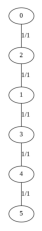

In [ ]:
f = gv.Graph(name= "solution_1", format = "png")
for k, v in solution.items():
    tail, head = k
    flow, capacity = v
    f.edge(str(tail), str(head), label="{}/{}".format(flow, capacity))
f.view()

im = img.imread("solution_1.gv.png")
plt.imshow(im)
plt.axis('off')
plt.show()